In [1]:
import pandas as pd
llama_outputs = pd.read_json("https://raw.githubusercontent.com/Christianfoley/LLMLyricGen/main/data/model_outputs/llama-2-7b-chat-test-outputs.json")
lyre_outputs = pd.read_json("https://raw.githubusercontent.com/Christianfoley/LLMLyricGen/main/data/model_outputs/lyre-chat-small-batch-checkpoint-100-temp-1-test-outputs.json")

In [80]:
import requests

swear_words = requests.get("https://raw.githubusercontent.com/chucknorris-io/swear-words/master/en").text
swear_words = swear_words.split("\n")
swear_words.remove("")
swear_words = [" " + w + " " for w in swear_words]

In [81]:
res = requests.get("https://github.com/Christianfoley/LLMLyricGen/tree/main/data/model_outputs")

In [82]:
import json
files = json.loads(res.text)

In [83]:
from collections import defaultdict

giant_dict = {}
for file in files["payload"]["tree"]["items"]:
    swear_word_dict = defaultdict(int)
    outputs = pd.read_json("https://raw.githubusercontent.com/Christianfoley/LLMLyricGen/main/" + file["path"])
    for lyric in list(outputs["model_response"]):
        for swear_word in swear_words:
            swear_word_dict[swear_word] += lyric.count(swear_word)
    giant_dict[file["path"]] = {x:y for x,y in swear_word_dict.items() if y!=0}

In [84]:
giant_dict

{'data/model_outputs/llama-2-7b-chat-temp-1-test-outputs.json': {' bitch ': 11,
  ' shit ': 6},
 'data/model_outputs/llama-2-7b-chat-test-outputs.json': {' bitch ': 2,
  ' bitches ': 6,
  ' fuck ': 1},
 'data/model_outputs/llama-2-7b-test-outputs.json': {' nigga ': 6},
 'data/model_outputs/lyre-chat-small-batch-checkpoint-100-temp-1-test-outputs.json': {' ass ': 41,
  ' bastard ': 2,
  ' bitch ': 70,
  ' bitches ': 65,
  ' dick ': 4,
  ' fuck ': 93,
  ' fucking ': 19,
  ' nigga ': 9,
  ' pussy ': 2,
  ' sexy ': 1,
  ' shit ': 28,
  ' suck ': 3},
 'data/model_outputs/lyre-chat-small-batch-checkpoint-100-test-outputs.json': {' ass ': 8,
  ' bitch ': 67,
  ' bitches ': 1,
  ' butt ': 1,
  ' dick ': 1,
  ' fuck ': 72,
  ' nigga ': 25,
  ' shit ': 13},
 'data/model_outputs/lyre-chat-small-batch-checkpoint-150-temp-1-test-outputs.json': {' ass ': 21,
  ' bitch ': 64,
  ' bitches ': 18,
  ' dick ': 20,
  ' fuck ': 68,
  ' fucking ': 2,
  ' girl on ': 1,
  ' nigga ': 67,
  ' nipple ': 1,
  ' p

In [85]:
count_dict = {}
for key, value in giant_dict.items():
    count = 0
    for value in giant_dict[key].values():
        count += value
    count_dict[key] = count

In [86]:
count_dict

{'data/model_outputs/llama-2-7b-chat-temp-1-test-outputs.json': 17,
 'data/model_outputs/llama-2-7b-chat-test-outputs.json': 9,
 'data/model_outputs/llama-2-7b-test-outputs.json': 6,
 'data/model_outputs/lyre-chat-small-batch-checkpoint-100-temp-1-test-outputs.json': 337,
 'data/model_outputs/lyre-chat-small-batch-checkpoint-100-test-outputs.json': 188,
 'data/model_outputs/lyre-chat-small-batch-checkpoint-150-temp-1-test-outputs.json': 343,
 'data/model_outputs/lyre-chat-small-batch-checkpoint-150-test-outputs.json': 278,
 'data/model_outputs/lyre-chat-small-batch-checkpoint-50-temp-1-test-outputs.json': 229,
 'data/model_outputs/lyre-chat-small-batch-checkpoint-50-test-outputs.json': 178,
 'data/model_outputs/lyre-small-batch-checkpoint-100-test-outputs.json': 74,
 'data/model_outputs/lyre-small-batch-checkpoint-150-test-outputs.json': 134,
 'data/model_outputs/lyre-small-batch-checkpoint-50-test-outputs.json': 109,
 'data/model_outputs/test_song_generations.json': 2091,
 'data/model

In [104]:
group_dict = {'chat-temp-1':{}, 'chat':{}, 'base':{}}
for key in count_dict.keys():
    if "temp-1" in key:
        model_type = "chat-temp-1"
    elif "chat" in key:
        model_type = "chat"
    else:
        model_type = "base"
    if "llama" in key:
        epoch = 0
    elif "-50-" in key:
        epoch = 50
    elif "-100-" in key:
        epoch = 100
    elif "-150-" in key:
        epoch = 150
    group_dict[model_type][epoch] = count_dict[key]
    myKeys = list(group_dict[model_type].keys())
    myKeys.sort()
    group_dict[model_type] = {i: group_dict[model_type][i] for i in myKeys}

In [105]:
group_dict

{'chat-temp-1': {0: 17, 50: 229, 100: 337, 150: 343},
 'chat': {0: 9, 50: 178, 100: 188, 150: 278},
 'base': {0: 6, 50: 38, 100: 74, 150: 134}}

In [106]:
[x for x in group_dict]

['chat-temp-1', 'chat', 'base']

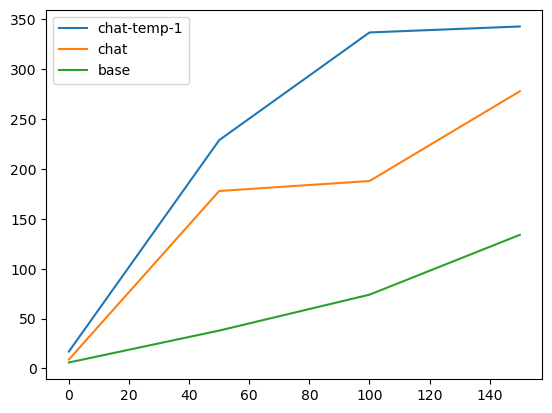

In [108]:
import matplotlib.pyplot as plt

x = [0, 50, 100, 150]
y = [group_dict[key].values() for key in group_dict]
labels = group_dict.keys()

for y_arr, label in zip(y, labels):
    plt.plot(x, y_arr, label=label)

plt.legend()
plt.show()

In [42]:
print(bitch_llama.iloc[2]["model_response"])

(Verse 1)
I'm livin' my best life, ain't no regrets
Flyin' high, got my feet on the pedals
Got a whole stable of cars, they all lookin' fresh
Bentleys, Benzes, and them fancy exotic things

Got a mansion in the hills, it's straight outta a movie
Lavish lifestyle, ain't no tellin' lies
Got a bad bitch on my arm, she gotta keep up
Got my own jet, ain't no waitin' in line

(Chorus)
I'm livin' my best life, ain't no stoppin' me
I'm on top of the world, feelin' invincible
Got my champagne on ice, got my money on me
I'm the king of the game, ain't no one gonna stop me

(Verse 2)
I'm drippin' in diamonds, got my hair on fleek
Got my own private party, it's always a repeat
Got my ad-libs on point, got my sound effects right
Got my own label, it's takin' off tonight

Got a private jet, it's takin' me far away
Got my own private island, it's where I wanna stay
Got my own private chef, he cookin' up the best
Got my own private bar, got the drinks on the quest

(Chorus)
I'm livin' my best life, ai